In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def getDF(path,model_name):
    loss = pd.read_csv(path+model_name+'/loss.tsv',sep='\t')
    return loss
        
def Plotter(loss,model_name,save = False):

    fig, ax1 = plt.subplots(figsize=[10,5])
    ax1.plot(loss.DEV_LOSS,label='DEV_LOSS');ax1.plot(loss.TRAIN_LOSS,label='TRAIN_LOSS')
    ax2 = ax1.twinx() 
    ax2.plot(loss.DEV_F1,color = 'black',label='DEV_F1_Score')

    ax1.set_ylabel('LOSS'); ax2.set_ylabel('F1 Score')
    ax1.legend(loc = 8);ax2.legend(loc = 7)
    ax1.set_xlabel('Epoches')

    ax1.set_title(model_name); ax1.grid(ls='--')

    plt.scatter(np.argmax(loss.DEV_F1)+1,max(loss.DEV_F1),marker='+',c='red')
    plt.annotate(str(max(loss.DEV_F1)), (np.argmax(loss.DEV_F1)+1, max(loss.DEV_F1)))

    if save == True:
        fig.savefig('resources/training_process_plots/'+model_name+'.png')

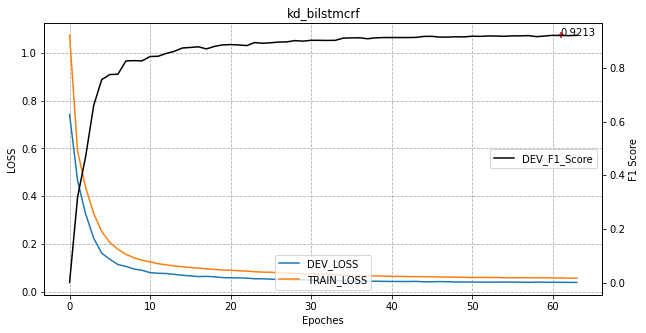

In [2]:
path = './resources/en_taggers/'; model_name = 'kd_bilstmcrf'
loss = pd.read_csv(path+model_name+'_64ep/loss.tsv',sep='\t')
Plotter(loss,model_name,save=False)

In [3]:
# uncommend the following code if models are trained from checkpoint and one wish to plot the whole training process
# path = './resources/taggers/'; model_name = 'baseline_bilstmcrf'
# loss1 = pd.read_csv(path+model_name+'_64ep/loss.tsv',sep='\t')
# loss2 = pd.read_csv(path+model_name+'_80ep/loss.tsv',sep='\t',header=None,index_col=0)
# loss2.columns=loss1.columns
# com_loss = pd.concat([loss1,loss2])
# Plotter(com_loss,model_name,save=False)